In [2]:
%display latex
1/0.00055

1818.18181818182

In [3]:
1/440.0

0.00227272727272727

In [7]:
340/440.0

0.772727272727273

In [8]:
340/0.772

440.414507772021

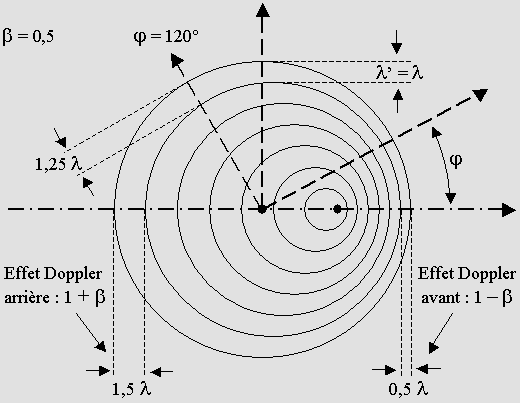

In [9]:
from numpy import array,arange

# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")

E = 134.28637169369105 eV
